In [1]:
# Import packages
import os
import cv2
import numpy as np
import pandas as pd
import sys
import glob
import json
from shutil import copyfile

import matplotlib.pyplot as plt
from IPython.display import clear_output
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [154]:
PATH_TO_IMAGES = '/home/mr/cell_segmentation/data/interim/raw_for_labeling/28 06 2018 mnc+MSC_Hom/Pl_2/'

In [155]:
# get files of images
im_files = glob.glob(PATH_TO_IMAGES + '*')

In [156]:
# get images¶
figs = []
for im in im_files:
    img = cv2.imread(im)
    figs.append(img)

In [157]:
figs[0].shape

(1040, 1392, 3)

In [9]:
# get average and std of each image
ava,sd = [],[]
for img in figs:
    ava.append(np.mean(img))
    sd.append(np.std(img))

Text(0,0.5,'std')

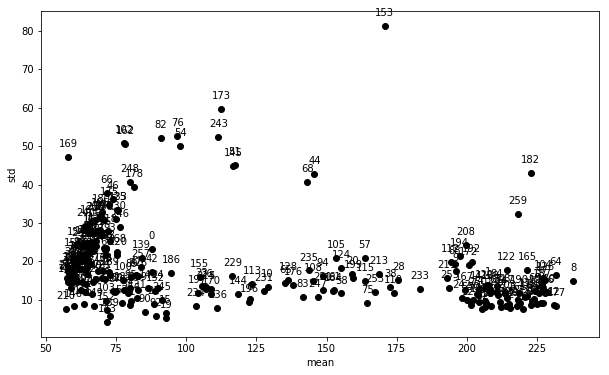

In [85]:
# plot images in the space of its means and std
plt.figure(figsize=(10,6))
plt.scatter(ava,sd, c='k')

# plot indexes of each image
for i in range(len(ava)):
    x,y = ava[i],sd[i]
    label = str(i)
    plt.annotate(label, 
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xlabel('mean')
plt.ylabel('std')

### we see the clusters (colour: some pics are light, others are dark); what images form them?

In [134]:
def plot_img_by_ind(*ind_set,im_set):
    """
    plot images by indexes. input only the indexes and enjoy
    """
    nrow = len(ind_set) // 3 + 1
    plt.figure(figsize=(16, 11))
    for d,i in enumerate(ind_set):
        plt.subplot(nrow,3,d+1)
        imshow(im_set[i])
    show()

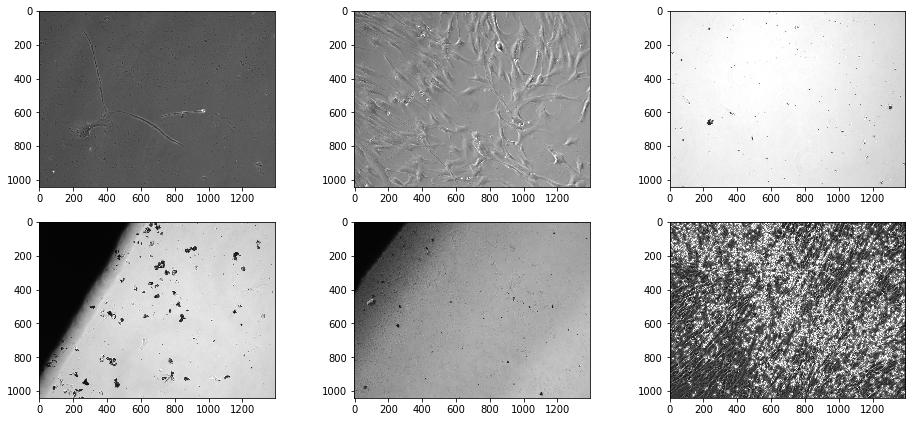

In [86]:
plot_img_by_ind(90,235,8,
                153,44,173,im_set=figs)

### kmeans to split the similar pics

In [87]:
from sklearn.cluster import KMeans

In [88]:
km = KMeans(n_clusters=4, n_jobs=4)

In [107]:
X = np.array([ava,sd]).T
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [108]:
labels = km.predict(X)

Text(0,0.5,'std')

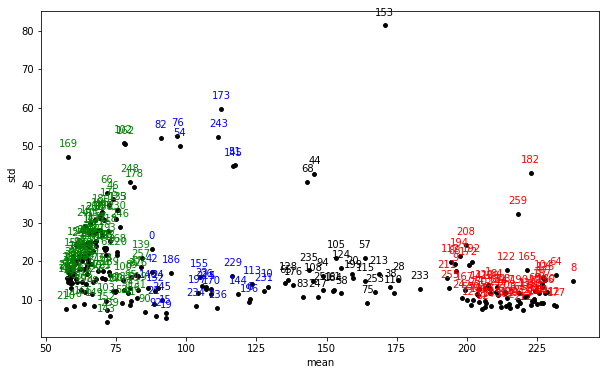

In [116]:
# plot images in the space of its means and std with labels
plt.figure(figsize=(10,6))
plt.scatter(ava,sd, c='k',s=15)

for i in range(len(ava)):
    x,y = ava[i],sd[i]
    label = str(i)
    plt.annotate(label, (x,y), textcoords="offset points",xytext=(0,10), ha='center',color='brgk'[labels[i]])

plt.xlabel('mean')
plt.ylabel('std')

### Create dirs and copy images

In [117]:
def create_dir(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [122]:
NEW_PATH = '/home/mr/cell_segmentation/data/interim/img_clusters_for_labeling/' # path for clustered images
create_dir(NEW_PATH)
for p in set(labels):
    create_dir(NEW_PATH + str(p)) # path for clusters

In [127]:
for i,label in enumerate(labels):
    src = im_files[i] # copy-in
    im_name = os.path.split(src)[-1]
    dst = '/home/mr/cell_segmentation/data/interim/img_clusters_for_labeling/{}/{}'.format(label,im_name) # copy-out
    copyfile(src,dst)

### now we will clean images; current set is abundunt. we will delete some pics by hand to decrease the dataset

----

# repeat action for summer dataset

In [158]:
PATH = '/home/mr/cell_segmentation/data/raw/summer_project/'

In [159]:
im_files = glob.glob(PATH + '*')

In [160]:
# get images¶
figs = []
for im in im_files:
    img = cv2.imread(im)
    figs.append(img)

In [161]:
# get average and std of each image
ava,sd = [],[]
for img in figs:
    ava.append(np.mean(img))
    sd.append(np.std(img))

Text(0,0.5,'std')

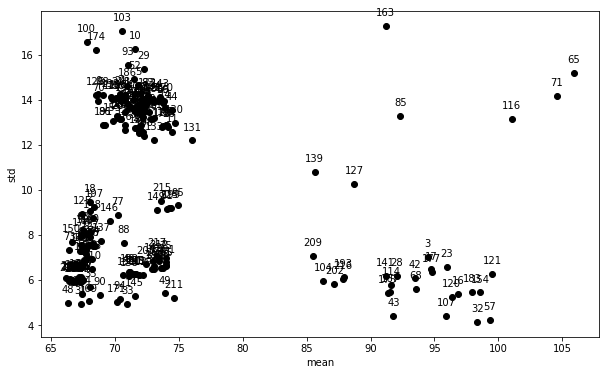

In [162]:
# plot images in the space of its means and std
plt.figure(figsize=(10,6))
plt.scatter(ava,sd, c='k')

# plot indexes of each image
for i in range(len(ava)):
    x,y = ava[i],sd[i]
    label = str(i)
    plt.annotate(label, 
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xlabel('mean')
plt.ylabel('std')

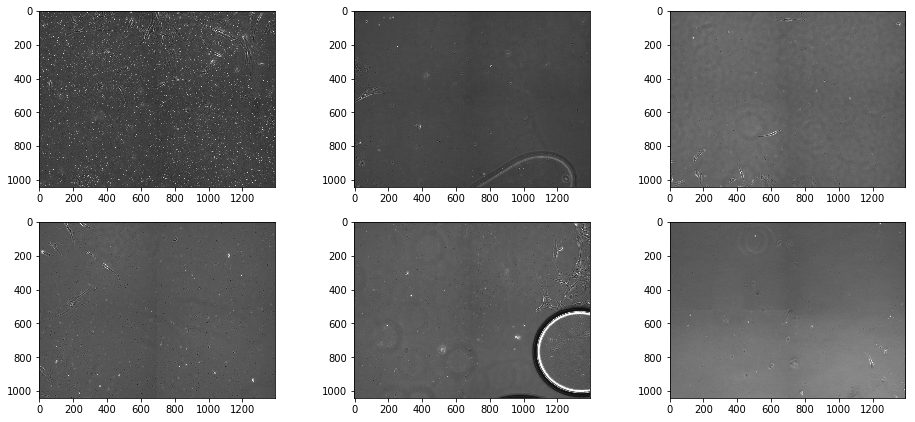

In [163]:
plot_img_by_ind(100, 90, 121, 209, 163, 65, im_set=figs)

### kmeans to split the similar pics

In [164]:
km = KMeans(n_clusters=3, n_jobs=4)

In [165]:
X = np.array([ava,sd]).T
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [166]:
labels = km.predict(X)

Text(0,0.5,'std')

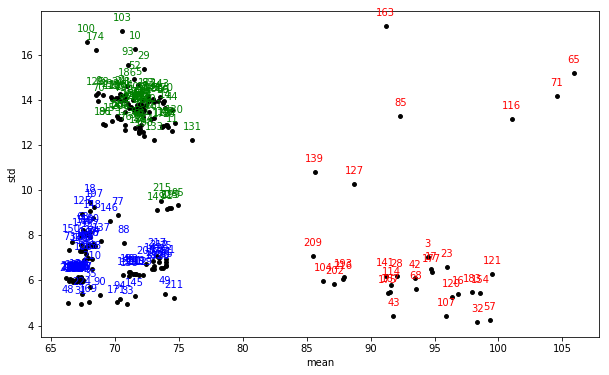

In [167]:
# plot images in the space of its means and std with labels
plt.figure(figsize=(10,6))
plt.scatter(ava,sd, c='k',s=15)

for i in range(len(ava)):
    x,y = ava[i],sd[i]
    label = str(i)
    plt.annotate(label, (x,y), textcoords="offset points",xytext=(0,10), ha='center',color='brgk'[labels[i]])

plt.xlabel('mean')
plt.ylabel('std')

In [168]:
labels = labels + 4

In [171]:
NEW_PATH = '/home/mr/cell_segmentation/data/interim/img_clusters_for_labeling/' # path for clustered images
create_dir(NEW_PATH)
for p in set(labels):
    create_dir(NEW_PATH + str(p)) # path for clusters

In [172]:
for i,label in enumerate(labels):
    src = im_files[i] # copy-in
    im_name = os.path.split(src)[-1]
    dst = '/home/mr/cell_segmentation/data/interim/img_clusters_for_labeling/{}/{}'.format(label,im_name) # copy-out
    copyfile(src,dst)